# Least Squares and Least Norm Problems

In this section, we'll depart from concepts you likely have seen in linear algebra classes and move into some topics that might be new to you. 

### Python Setup

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

from helpers import get_least_norm_matrices

In [2]:
rcParams['font.size'] = 16

### Solving for x

Recall the transmitter/receiver picture that I described in the 

### Vector Norms

Before diving into the next example, we need to introduce a new concept - the **norm** of a vector. To make it concise, a norm is a measure of how big something is. Think of it as the generalization of absolute value to multiple dimensions.

How do you describe a vector's size? Well, you have choices, and by convention they are labeled using $L_p$ notation:

 - Do you count how many elements it has $(L_0)$?
 - Do you add up all the elements $(L_1)$?
 - Do you measure how "long" the "arrow" is $(L_2)$?
 - Do you use the size of the biggest element $(L_\infty)$?

You could employ alternative norms like $L_3$, but they don't have friendly, physical interpretations like the ones above. 

Within this list, the $L_2$ norm happens to have nice, closed-form analytic solutions for things like least squares problems. Before you had unlimited computing power, one wouldn't be able to make much headway otherwise. I would speculate that the "length of the arrow" visual is also more appealing to people than other measures of size. Even though the norm you choose for regularization impacts on the types of residuals you get with an optimal solution, I don't think most people are a) aware of that, or b) consider it deeply when formulating their problem. At this point, I expect most people keep using $L_2$ because it's "what everyone does."


In [3]:
A, B, C = get_least_norm_matrices()

In [10]:
# Naive control
y_des = np.array([.2, -.2]).reshape(-1, 1)

I = np.eye(N)
A_inv = np.linalg.inv(I - A)

u_static = np.linalg.inv(C @ A_inv @ B) @ y_des
x_static = A_inv @ B @ u_static

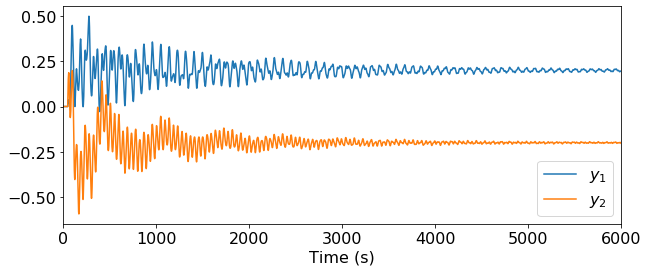

In [16]:
x = np.zeros(N).reshape(-1, 1)
ys = []

T = 6000
for t in np.arange(T):
    u = u_static if t > 50 else np.zeros(2).reshape(-1, 1)
    x = A @ x + B @ u
    ys.append(C @ x)
    
ys = np.array(ys)

plt.figure(figsize=(10, 4))
plt.plot(ys[:, :, 0])
plt.xlim(0, T)
plt.xlabel('Time (s)')
plt.legend(['$y_1$', '$y_2$'])

plt.show()

In [17]:
T = 1000  # Total simulation time
To = 800  # Time to reach target

blocks = [np.linalg.matrix_power(A, t) @ B for t in range(To-2, -1, -1)]
P = np.hstack(blocks)

temp = np.linalg.pinv(P) @ x_static
u_opt = np.repeat(u_static, T, axis=1)
u_opt[0, :To-1] = temp[::2].reshape(1, -1)
u_opt[1, :To-1] = temp[1::2].reshape(1, -1)

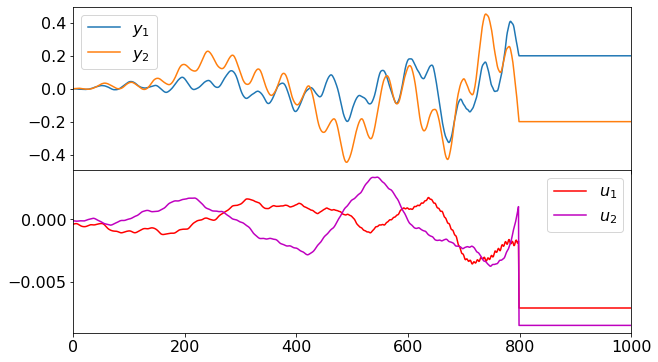

In [21]:
x = np.zeros(N).reshape(-1, 1)
ys = [C @ x]

for t in np.arange(T):
    u = u_opt[:, t].reshape(-1, 1)
    
    x = A @ x + B @ u
    ys.append(C @ x)
    
ys = np.array(ys)

fig, (y_ax, u_ax) = plt.subplots(2, sharex=True, figsize=(10, 6))
plt.subplots_adjust(hspace=0)

plt.sca(y_ax)
plt.plot(ys[:, :, 0])
plt.legend(['$y_1$', '$y_2$'])

plt.sca(u_ax)
plt.plot(u_opt[0, :].T, color='r')
plt.plot(u_opt[1, :].T, color='m')
plt.legend(['$u_1$', '$u_2$'])

plt.xlim(0, T)
plt.show()

$
\begin{align*}
x(t+1) &= Ax(t) + Bu(t) \\
y(t) &= Cx(t)
\end{align*}
$

$u_{ss}=(C(I-A)^{-1}B)^{-1}y_{target}$

$
\begin{align*}
y(t) = C\begin{bmatrix}A^{t-2}B & A^{t-3}B & \ldots & AB & B\end{bmatrix}
\begin{bmatrix}u(1) \\ u(2) \\ \vdots \\ u(t-1)\end{bmatrix}
\end{align*}
$

$y=Mu$

$u_{opt} = M^{\dagger}y_{target}$

In [ ]:
np.linalg.pinv(A)